# Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from matplotlib.collections import LineCollection

from sklearn import decomposition
from sklearn import preprocessing

import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Data load

In [2]:
data = pd.read_csv('en.openfoodfacts.org.products.filtered.csv', sep =';', decimal= ',', 
                   encoding = 'utf8', low_memory=False)

print('Nombre de colonnes: ' + str(len(data.columns)))
print('Nombre de lignes: ' + str(len(data)))

Nombre de colonnes: 24
Nombre de lignes: 102463


# Functions library

In [3]:
def HorizontalBarChart(series, y_labels, bar_lenght, bar_width, xlim_min, xlim_max,
                       xlabel, ylabel, title):
    # Plot the figure.
    plt.figure(figsize=(bar_lenght, bar_width))
    
    ax = series.plot(kind='barh')
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_yticklabels(y_labels)
    ax.set_xlim(xlim_min, xlim_max) # expand xlim to make labels easier to read

    plt.show()

In [4]:
def tableau(df, column):
    effectifs = df[column].value_counts()
    modalites = effectifs.index 

    tab = pd.DataFrame(modalites, columns = [column]) 
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(df) 
    tab = tab.sort_values(column) 
    tab["F"] = tab["f"].cumsum() 

    return tab

In [5]:
def univarie_qualitative(_df, _feature, _type, _tc, _title, _xlabel, _ylabel):
    print('-----------------------------------------------------------')
    print('Distribution empirique')
    print('-----------------------------------------------------------')
    print(tableau(_df, _feature))
    
    total = float(len(_df))
    if _type=='pie':
        _df[_feature].value_counts(normalize=False).plot(kind=_type, title = _title, xlabel = _xlabel, 
                                                         ylabel = _ylabel, autopct='%1.1f%%')
    else:
        ax = _df[_feature].value_counts(normalize=False).plot(kind=_type, title = _title, 
                                                         xlabel = _xlabel, ylabel = _ylabel)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format((height/total)*100)+'%', ha="center") 
    
    plt.xticks(rotation=0)
    plt.gcf().savefig('univarie_qualitative_' + _title, dpi=100)
    plt.show()
    if _tc:
        print('')
        print('-----------------------------------------------------------')
        print('Mesures à tendance centrale')
        print('-----------------------------------------------------------')
        print('Mode: ' + str(_df[_feature].mode()))
    print('')
    print('La variable ' + _feature + ' est une variable qualitative dont la distribution empirique comprend les valeurs:')
    print(_df[_feature].unique())

In [6]:
def univarie_quantitative_discrete(_df, _feature, _type, _title, _xlabel, _ylabel):
    print('-----------------------------------------------------------')
    print('Distribution empirique')
    print('-----------------------------------------------------------')
    print(tableau(_df, _feature))
    _df[_feature].value_counts(normalize=False).plot(kind=_type, title = _title, xlabel = _xlabel, 
                                                     ylabel = _ylabel)
    plt.gcf().savefig('univarie_quantitative_discrete_' + _title + _type, dpi=100)
    plt.show()
    print('')
    print('-----------------------------------------------------------')
    print('Mesures à tendance centrale & dispersion')
    print('-----------------------------------------------------------')
    print(_df[_feature].describe())
    print('')
    print('Mode: ' + str(_df[_feature].mode()))
    _df.boxplot(column=_feature, vert=False, showmeans=True)
    plt.yticks(rotation=90)
    plt.gcf().savefig('univarie_quantitative_discrete_' + _title + '_boxplot', dpi=100)
    plt.show()
    print('')
    print('La variable ' + _feature + ' est une variable quantitative discrète dont la distribution empirique comprend les valeurs:')
    print(_df[_feature].unique())

In [7]:
def univarie_quantitative_continue(_df, _feature, _bin, _xlabel, _ylabel):
    print('-----------------------------------------------------------')
    print('Distribution empirique')
    print('-----------------------------------------------------------')
    _df[_feature].hist(density=False,bins=_bin)
    plt.xlabel(_xlabel)
    plt.ylabel(_ylabel)
    plt.gcf().savefig('univarie_quantitative_continue_' + _feature + '_hist', dpi=100)
    plt.show()
    print('')
    print('-----------------------------------------------------------')
    print('Mesures à tendance centrale & dispersion')
    print('-----------------------------------------------------------')
    print(_df[_feature].describe())
    print('')
    print('Mode: ' + str(_df[_feature].mode()))
    print('')
    print('-----------------------------------------------------------')
    print('Boxplot')
    print('-----------------------------------------------------------')
    _df.boxplot(column=_feature, vert=False, showmeans=True)
    plt.yticks(rotation=90)
    plt.gcf().savefig('univarie_quantitative_continue_' + _feature + '_boxplot', dpi=100)
    plt.show()

In [8]:
def bivarie_qualitative_continue(_df, _qualitative, _quantitative):
    X = _qualitative
    Y = _quantitative

    modalites = _df[X].unique()
    groupes = []
    for m in modalites:
        groupes.append(_df[_df[X]==m][Y])

    # Propriétés graphiques  
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}

    plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.gcf().savefig('bivarie_' + _qualitative + '_' + _quantitative + '_boxplot', dpi=100)
    plt.show()

In [9]:
def bivarie_scatter(_df, _x, _y):
    area = (15 * np.random.rand(len(_df)))
    plt.scatter(_df[_x], _df[_y], s=area, alpha=0.5)
    plt.xlabel(_x)
    plt.ylabel(_y)
    plt.gcf().savefig('bivarie_scatter_' + _x + '_' + _y, dpi=100)
    plt.show()

In [10]:
def test_stat_continue_continue(_df, _xfeature, _yfeature, _bin):
    print('-----------------------------------------------------------')
    print('Covariance')
    print('-----------------------------------------------------------')
    print('Covariance: ' + str(np.cov(_df[_xfeature],_df[_yfeature],ddof=0)[1,0]))
    print('')
    print('-----------------------------------------------------------')
    print('Coefficient de corrélation Pearson')
    print('-----------------------------------------------------------')
    stat, p = st.pearsonr(_df[_xfeature],_df[_yfeature])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probablement indépendant')
    else:
        print('Probablement dépendant')
    print('')
    print('-----------------------------------------------------------')
    print('Régression linéaire')
    print('-----------------------------------------------------------')
    sns.regplot(x = _xfeature, y = _yfeature, data = _df, x_bins = _bin, color = 'Orange')
    plt.gcf().savefig('test_stat__' + _xfeature + '_' + _yfeature, dpi=100)

In [11]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [12]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [13]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

# Filling rate

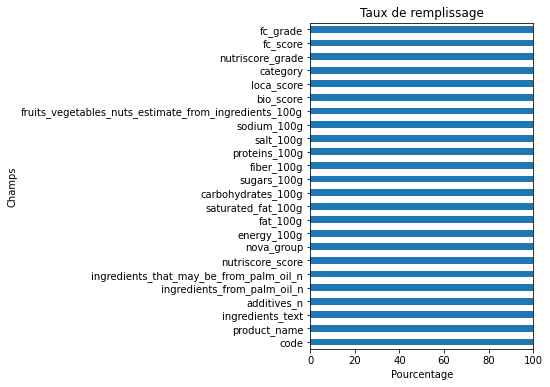

In [14]:
percentages = []
for column in data.columns:
    percentages.append(round((1-(len(data) - len(data[column].dropna()))/len(data))*100,3))

series = pd.Series(percentages)

y_labels = data.columns.tolist()

HorizontalBarChart(series, y_labels, 4, 6, 0, 100, 
                   'Pourcentage', 'Champs', 'Taux de remplissage')

# Univariate analyzes

## Qualitative variables

### nova_group

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------
   nova_group      n         f         F
2         1.0  14101  0.137620  0.137620
3         2.0   2321  0.022652  0.160272
1         3.0  28610  0.279223  0.439495
0         4.0  57431  0.560505  1.000000


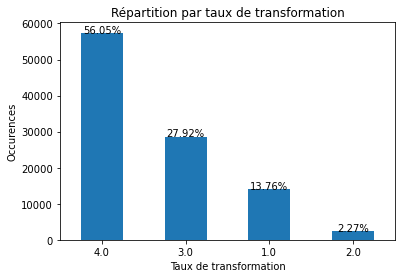


-----------------------------------------------------------
Mesures à tendance centrale
-----------------------------------------------------------
Mode: 0    4.0
dtype: float64

La variable nova_group est une variable qualitative dont la distribution empirique comprend les valeurs:
[4. 3. 1. 2.]


In [15]:
univarie_qualitative(data, 'nova_group', 'bar', True, 'Répartition par taux de transformation', 
                     'Taux de transformation', 'Occurences')

### bio_score

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------
  bio_score      n         f         F
1       bio  24666  0.240731  0.240731
0   non bio  77797  0.759269  1.000000


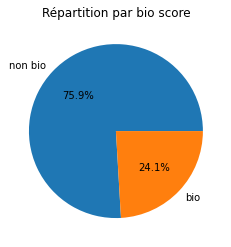


La variable bio_score est une variable qualitative dont la distribution empirique comprend les valeurs:
['non bio' 'bio']


In [16]:
univarie_qualitative(data, 'bio_score', 'pie', False, 'Répartition par bio score', '', '')

### loca_score

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------
  loca_score      n         f         F
2     Europe  14080  0.137415  0.137415
0     France  47614  0.464695  0.602110
1      Monde  40769  0.397890  1.000000


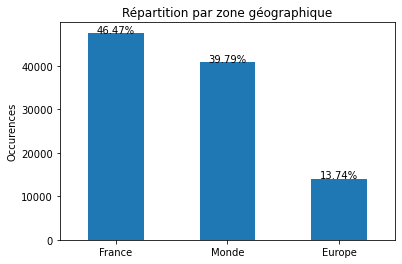


La variable loca_score est une variable qualitative dont la distribution empirique comprend les valeurs:
['France' 'Monde' 'Europe']


In [17]:
univarie_qualitative(data, 'loca_score', 'bar', False, 'Répartition par zone géographique', 
                     '', 'Occurences')

### category

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------
  category      n         f         F
1    autre  30473  0.297405  0.297405
3  boisson  12004  0.117154  0.414559
2  dessert  29510  0.288006  0.702566
0     plat  30476  0.297434  1.000000


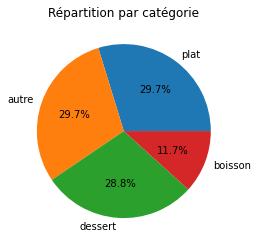


La variable category est une variable qualitative dont la distribution empirique comprend les valeurs:
['plat' 'dessert' 'autre' 'boisson']


In [18]:
univarie_qualitative(data, 'category', 'pie', False, 'Répartition par catégorie', '', '')

## Quantitative variables

### Discreet

#### additives_n

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------
    additives_n      n         f         F
0           0.0  47569  0.464255  0.464255
1           1.0  18741  0.182905  0.647160
2           2.0  12017  0.117281  0.764442
3           3.0   7948  0.077569  0.842011
4           4.0   5365  0.052360  0.894372
5           5.0   3663  0.035749  0.930121
6           6.0   2423  0.023648  0.953769
7           7.0   1629  0.015898  0.969667
8           8.0   1044  0.010189  0.979856
9           9.0    697  0.006802  0.986659
10         10.0    450  0.004392  0.991050
11         11.0    282  0.002752  0.993803
12         12.0    185  0.001806  0.995608
13         13.0    134  0.001308  0.996916
14         14.0    112  0.001093  0.998009
15         15.0     65  0.000634  0.998643
16         16.0     48  0.000468  0.999112
17         17.0     44  0.000429  0.999541
18         18.0     23  0.000224  0.9997

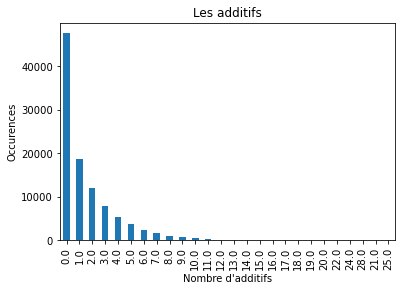


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          1.595678
std           2.323624
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          28.000000
Name: additives_n, dtype: float64

Mode: 0    0.0
dtype: float64


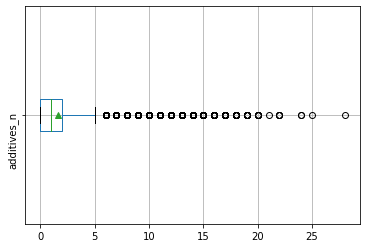


La variable additives_n est une variable quantitative discrète dont la distribution empirique comprend les valeurs:
[ 2.  4.  0.  1.  3.  7.  5. 11.  6. 10.  8. 13.  9. 16. 17. 14. 15. 12.
 19. 20. 18. 22. 28. 24. 21. 25.]


In [19]:
univarie_quantitative_discrete(data, 'additives_n', 'bar', 'Les additifs', "Nombre d'additifs", 
                               'Occurences')

#### ingredients_from_palm_oil_n

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------
   ingredients_from_palm_oil_n      n         f         F
0                          0.0  98341  0.959771  0.959771
1                          1.0   4064  0.039663  0.999434
2                          2.0     58  0.000566  1.000000


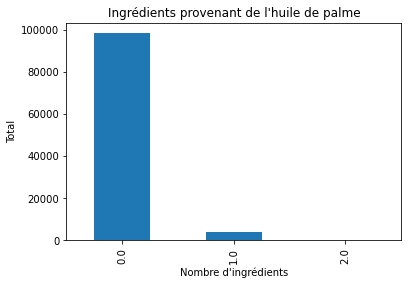


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          0.040795
std           0.200658
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64

Mode: 0    0.0
dtype: float64


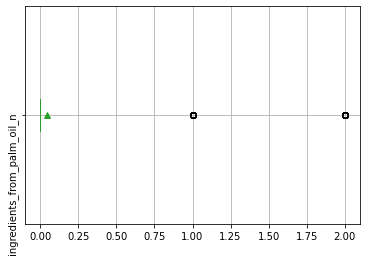


La variable ingredients_from_palm_oil_n est une variable quantitative discrète dont la distribution empirique comprend les valeurs:
[0. 1. 2.]


In [20]:
univarie_quantitative_discrete(data, 'ingredients_from_palm_oil_n', 'bar', 
                               "Ingrédients provenant de l'huile de palme", 
                               "Nombre d'ingrédients", 'Total')

#### ingredients_that_may_be_from_palm_oil_n

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------
   ingredients_that_may_be_from_palm_oil_n      n         f         F
0                                      0.0  93301  0.910582  0.910582
1                                      1.0   7266  0.070913  0.981496
2                                      2.0   1507  0.014708  0.996204
3                                      3.0    311  0.003035  0.999239
4                                      4.0     68  0.000664  0.999902
5                                      5.0     10  0.000098  1.000000


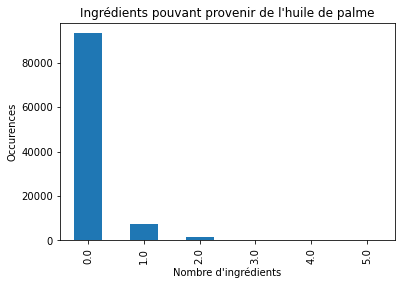


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          0.112577
std           0.396797
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64

Mode: 0    0.0
dtype: float64


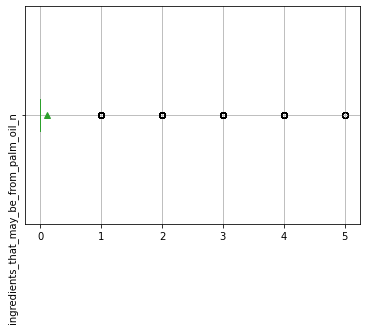


La variable ingredients_that_may_be_from_palm_oil_n est une variable quantitative discrète dont la distribution empirique comprend les valeurs:
[0. 2. 1. 3. 4. 5.]


In [21]:
univarie_quantitative_discrete(data, 'ingredients_that_may_be_from_palm_oil_n', 'bar', 
                               "Ingrédients pouvant provenir de l'huile de palme", 
                               "Nombre d'ingrédients", 'Occurences')

### Continue

#### fc_score

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


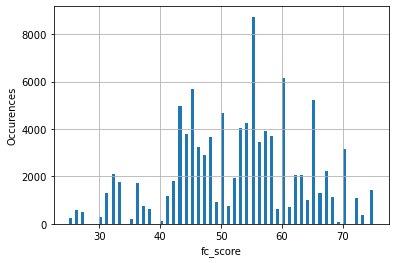


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean         52.618487
std          10.433895
min          25.000000
25%          45.000000
50%          54.000000
75%          60.000000
max          75.000000
Name: fc_score, dtype: float64

Mode: 0    55
dtype: int64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


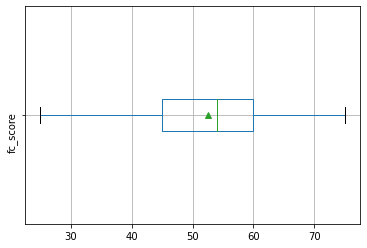

In [22]:
univarie_quantitative_continue(data, 'fc_score', 100, 'fc_score', 'Occurences')

#### nutriscore_score

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


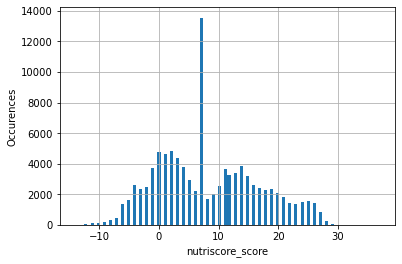


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          8.341069
std           8.472993
min         -14.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          37.000000
Name: nutriscore_score, dtype: float64

Mode: 0    7.0
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


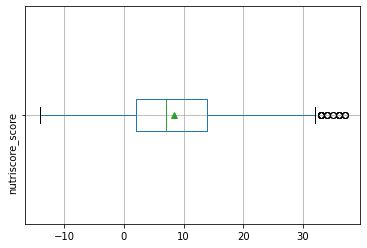

In [23]:
univarie_quantitative_continue(data, 'nutriscore_score', 100, 'nutriscore_score', 'Occurences')

#### energy_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


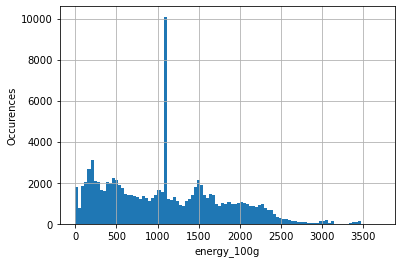


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean       1093.491742
std         713.040205
min           0.000000
25%         477.000000
50%        1091.838313
75%        1582.000000
max        3699.000000
Name: energy_100g, dtype: float64

Mode: 0    1091.838313
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


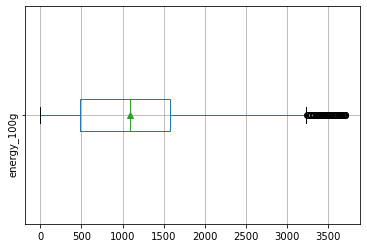

In [24]:
univarie_quantitative_continue(data, 'energy_100g', 100, 'energy_100g', 'Occurences')

#### fat_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


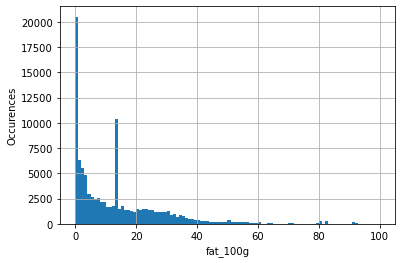


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean         13.404375
std          15.084159
min           0.000000
25%           1.700000
50%           9.500000
75%          20.000000
max         100.000000
Name: fat_100g, dtype: float64

Mode: 0    13.37431
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


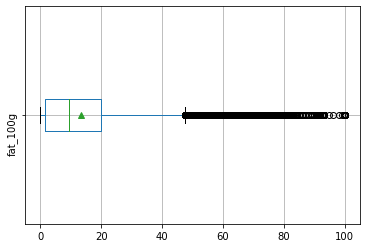

In [25]:
univarie_quantitative_continue(data, 'fat_100g', 100, 'fat_100g', 'Occurences')

#### saturated_fat_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


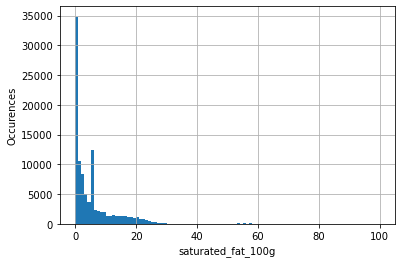


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          5.503889
std           7.719717
min           0.000000
25%           0.400000
50%           2.600000
75%           6.700000
max         100.000000
Name: saturated_fat_100g, dtype: float64

Mode: 0    0.0
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


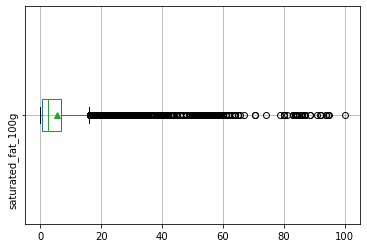

In [26]:
univarie_quantitative_continue(data, 'saturated_fat_100g', 100, 'saturated_fat_100g', 'Occurences')

#### carbohydrates_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


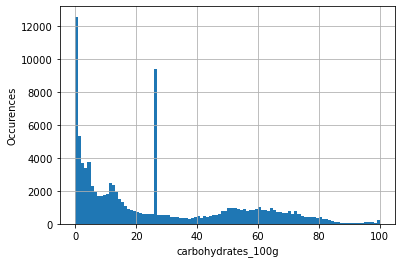


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean         26.510231
std          25.532535
min           0.000000
25%           4.100000
50%          17.000000
75%          49.000000
max         100.000000
Name: carbohydrates_100g, dtype: float64

Mode: 0    26.494085
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


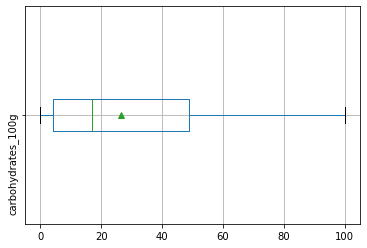

In [27]:
univarie_quantitative_continue(data, 'carbohydrates_100g', 100, 'carbohydrates_100g', 'Occurences')

#### sugars_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


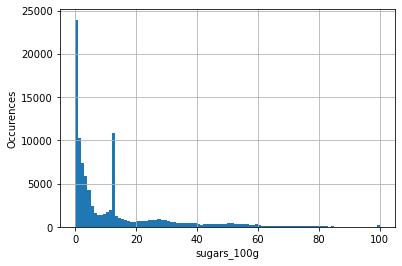


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean         12.788691
std          17.402554
min           0.000000
25%           1.000000
50%           4.800000
75%          14.600000
max         100.000000
Name: sugars_100g, dtype: float64

Mode: 0    12.800882
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


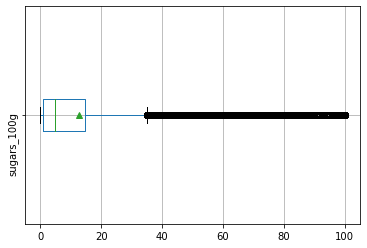

In [28]:
univarie_quantitative_continue(data, 'sugars_100g', 100, 'sugars_100g', 'Occurences')

#### fiber_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


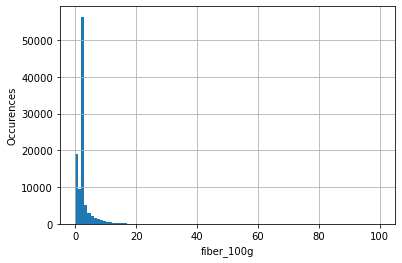


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          2.865523
std           2.996101
min           0.000000
25%           1.600000
50%           2.863248
75%           2.863248
max         100.000000
Name: fiber_100g, dtype: float64

Mode: 0    2.863248
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


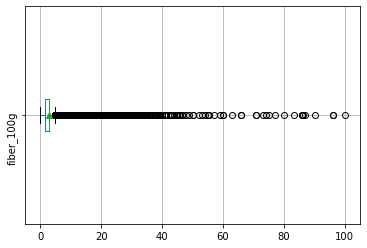

In [29]:
univarie_quantitative_continue(data, 'fiber_100g', 100, 'fiber_100g', 'Occurences')

#### proteins_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


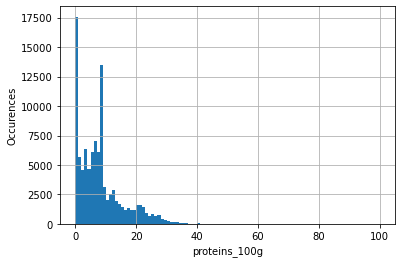


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          8.063845
std           7.417307
min           0.000000
25%           2.500000
50%           6.800000
75%          11.000000
max         100.000000
Name: proteins_100g, dtype: float64

Mode: 0    8.045196
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


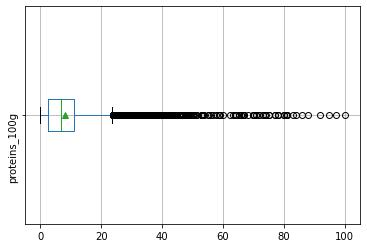

In [30]:
univarie_quantitative_continue(data, 'proteins_100g', 100, 'proteins_100g', 'Occurences')

#### salt_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


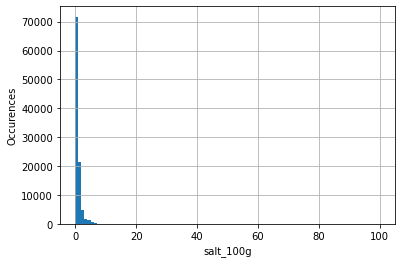


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          0.889065
std           1.546217
min           0.000000
25%           0.100000
50%           0.670000
75%           1.100000
max         100.000000
Name: salt_100g, dtype: float64

Mode: 0    0.0
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


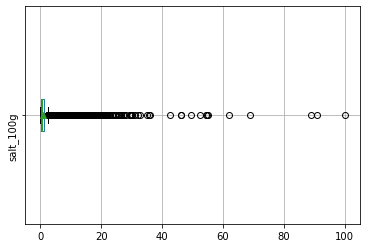

In [31]:
univarie_quantitative_continue(data, 'salt_100g', 100, 'salt_100g', 'Occurences')

#### sodium_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


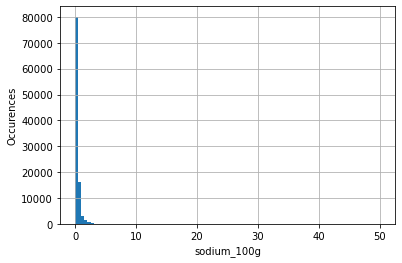


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.000000
mean          0.356214
std           0.637694
min           0.000000
25%           0.040000
50%           0.268000
75%           0.440000
max          49.987200
Name: sodium_100g, dtype: float64

Mode: 0    0.0
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


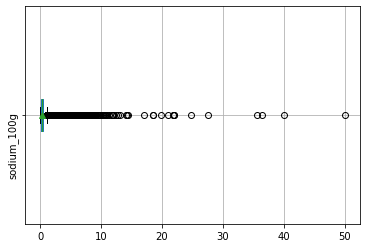

In [32]:
univarie_quantitative_continue(data, 'sodium_100g', 100, 'sodium_100g', 'Occurences')

#### fruits_vegetables_nuts_estimate_from_ingredients_100g

-----------------------------------------------------------
Distribution empirique
-----------------------------------------------------------


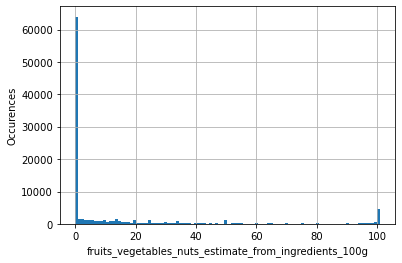


-----------------------------------------------------------
Mesures à tendance centrale & dispersion
-----------------------------------------------------------
count    102463.00000
mean         13.85076
std          27.47234
min           0.00000
25%           0.00000
50%           0.00000
75%          12.90000
max         100.89000
Name: fruits_vegetables_nuts_estimate_from_ingredients_100g, dtype: float64

Mode: 0    0.0
dtype: float64

-----------------------------------------------------------
Boxplot
-----------------------------------------------------------


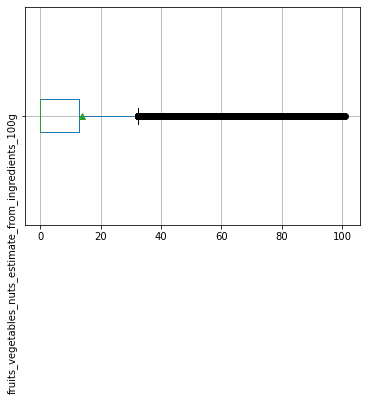

In [33]:
univarie_quantitative_continue(data, 'fruits_vegetables_nuts_estimate_from_ingredients_100g', 100, 
                               'fruits_vegetables_nuts_estimate_from_ingredients_100g', 'Occurences')

# Bivariate analyzes

## Nutriscore & nutritional issues

### Nutriscore vs energy

Assumption

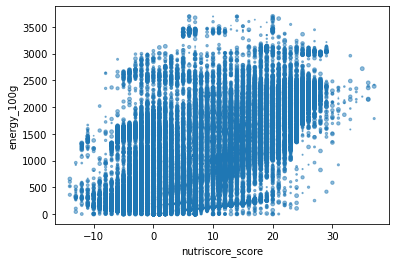

In [34]:
bivarie_scatter(data, 'nutriscore_score', 'energy_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: 3668.2075588274915

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=0.607, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


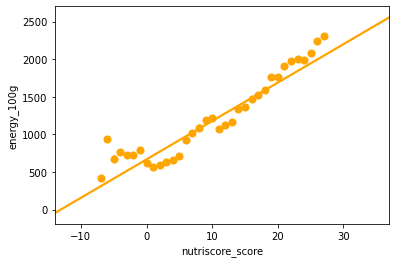

In [35]:
test_stat_continue_continue(data, 'nutriscore_score', 'energy_100g', 100)

### Nutriscore vs saturated fat

Assumption

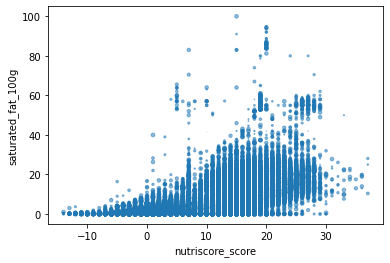

In [36]:
bivarie_scatter(data, 'nutriscore_score', 'saturated_fat_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: 41.36150895080853

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=0.632, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


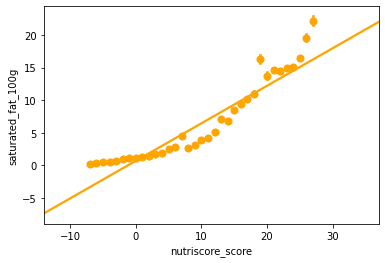

In [37]:
test_stat_continue_continue(data, 'nutriscore_score', 'saturated_fat_100g', 100)

### Nutriscore vs sugar

Assumption

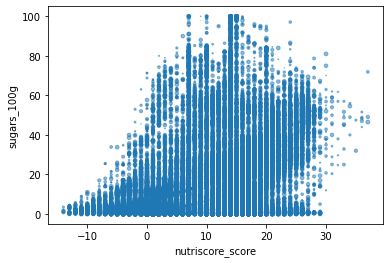

In [38]:
bivarie_scatter(data, 'nutriscore_score', 'sugars_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: 59.61350734751653

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=0.404, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


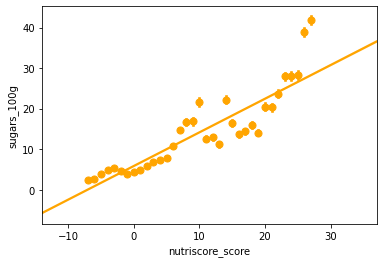

In [39]:
test_stat_continue_continue(data, 'nutriscore_score', 'sugars_100g', 100)

### Nutriscore vs fibers

Assumption

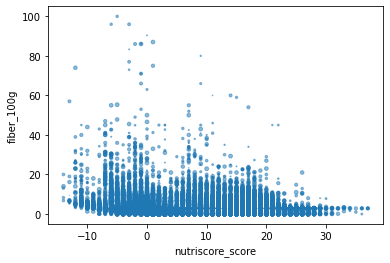

In [40]:
bivarie_scatter(data, 'nutriscore_score', 'fiber_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: -2.6640826047334247

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=-0.105, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


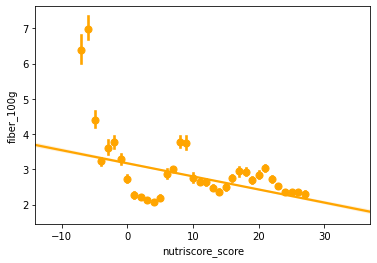

In [41]:
test_stat_continue_continue(data, 'nutriscore_score', 'fiber_100g', 100)

### Nutriscore vs proteins

Assumption

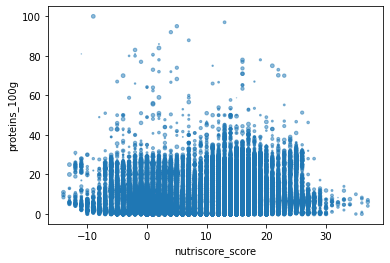

In [42]:
bivarie_scatter(data, 'nutriscore_score', 'proteins_100g')

Test

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: 6.957820635657853

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=0.111, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


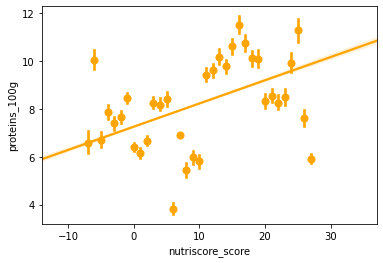

In [43]:
test_stat_continue_continue(data, 'nutriscore_score', 'proteins_100g', 100)

### Nutriscore vs sodium

Assumption

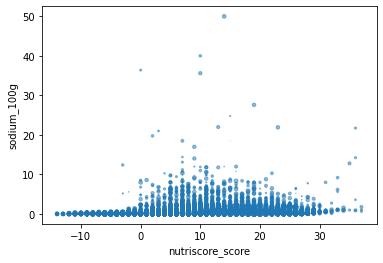

In [44]:
bivarie_scatter(data, 'nutriscore_score', 'sodium_100g')

Test

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: 1.0848635251623007

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=0.201, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


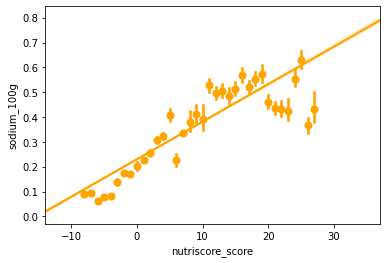

In [45]:
test_stat_continue_continue(data, 'nutriscore_score', 'sodium_100g', 200)

### Nutriscore vs additives

Assumption

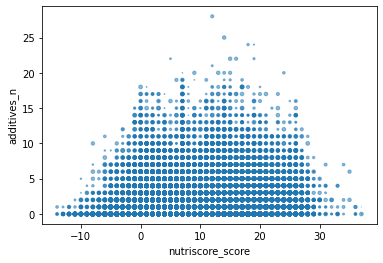

In [46]:
bivarie_scatter(data, 'nutriscore_score', 'additives_n')

Test

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: 3.8077825708454514

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=0.193, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


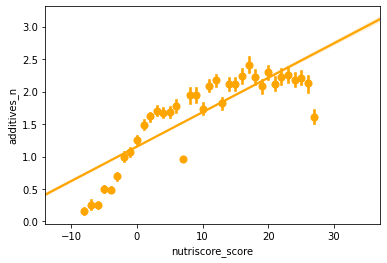

In [47]:
test_stat_continue_continue(data, 'nutriscore_score', 'additives_n', 200)

## Nutriscore & other issues

### Loca_score vs nutriscore

Assumption

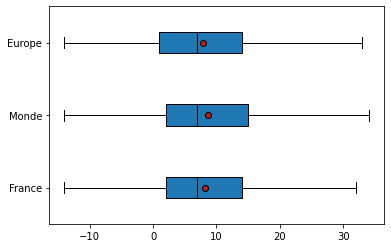

In [48]:
bivarie_qualitative_continue(data, 'loca_score', 'nutriscore_score')

ANOVA

In [49]:
eta_squared(data['loca_score'],data['nutriscore_score'])

0.001448728987252703

### Bioscore vs nutriscore

Assumption

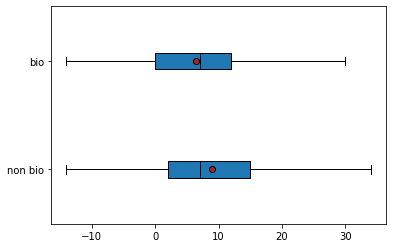

In [50]:
bivarie_qualitative_continue(data, 'bio_score', 'nutriscore_score')

ANOVA

In [51]:
eta_squared(data['bio_score'],data['nutriscore_score'])

0.015273619948848693

### Nova_group vs nutriscore

Assumption

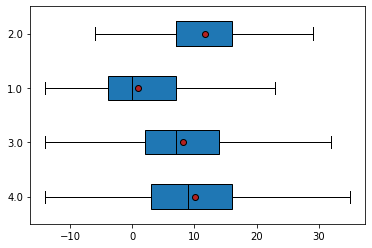

In [52]:
bivarie_qualitative_continue(data, 'nova_group', 'nutriscore_score')

ANOVA

In [53]:
eta_squared(data['nova_group'],data['nutriscore_score'])

0.1321643498085616

## Others

### Bio_score vs nova_group

Assumption

In [54]:
X = 'nova_group'
Y = 'bio_score'

contbio = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contbio

bio_score,bio,non bio,Total
nova_group,,,
1.0,5824,8277,14101
2.0,854,1467,2321
3.0,10092,18518,28610
4.0,7896,49535,57431
Total,24666,77797,102463


Contingency matrix

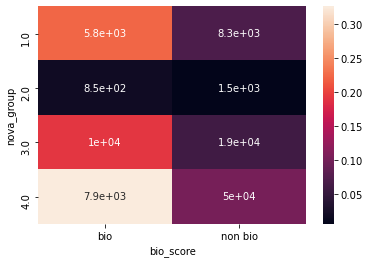

In [55]:
tx = contbio.loc[:,["Total"]]
ty = contbio.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = contbio.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

### Loca_score vs bio_score

Assumption

In [56]:
X = 'loca_score'
Y = 'bio_score'

contloca = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contloca

bio_score,bio,non bio,Total
loca_score,,,
Europe,6717,7363,14080
France,12925,34689,47614
Monde,5024,35745,40769
Total,24666,77797,102463


Contingency matrix

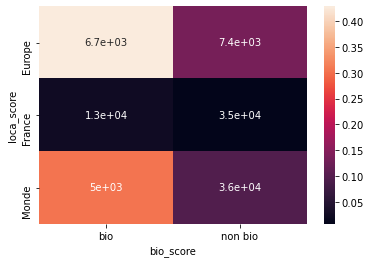

In [57]:
tx = contloca.loc[:,["Total"]]
ty = contloca.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = contloca.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

### Loca_score vs nova_group

Assumption

In [58]:
X = 'loca_score'
Y = 'nova_group'

contnova = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contnova

nova_group,1.0,2.0,3.0,4.0,Total
loca_score,,,,,
Europe,2627,624,4492,6337,14080
France,6657,1066,13802,26089,47614
Monde,4817,631,10316,25005,40769
Total,14101,2321,28610,57431,102463


Contingency matrix

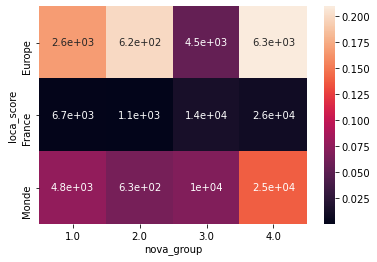

In [59]:
tx = contnova.loc[:,["Total"]]
ty = contnova.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = contnova.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

## FoodChoose score & nutritional issues

### FC score vs energy

Assumption

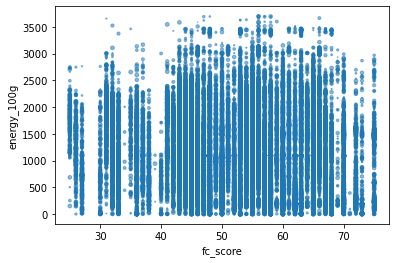

In [60]:
bivarie_scatter(data, 'fc_score', 'energy_100g')

Test

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: -995.7922520168786

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=-0.134, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


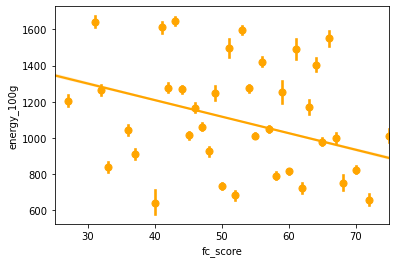

In [61]:
test_stat_continue_continue(data, 'fc_score', 'energy_100g', 100)

### FC score vs saturated fat

Assumption

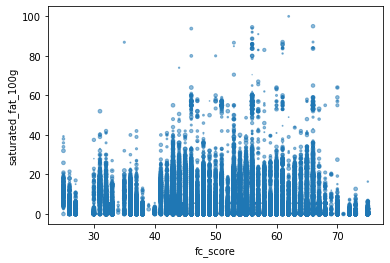

In [62]:
bivarie_scatter(data, 'fc_score', 'saturated_fat_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: -10.103493125861833

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=-0.125, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


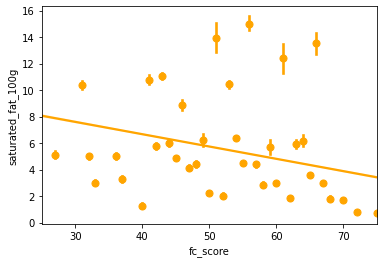

In [63]:
test_stat_continue_continue(data, 'fc_score', 'saturated_fat_100g', 100)

### FC score vs sugar

Assumption

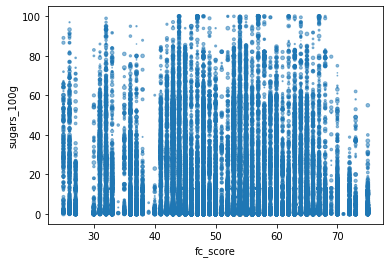

In [64]:
bivarie_scatter(data, 'fc_score', 'sugars_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: -27.438860055574562

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=-0.151, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


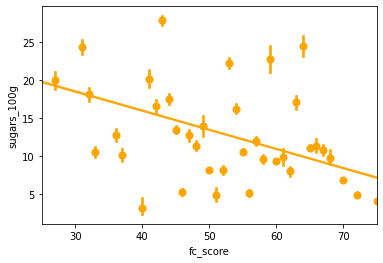

In [65]:
test_stat_continue_continue(data, 'fc_score', 'sugars_100g', 100)

### FC score vs fibers

Assumption

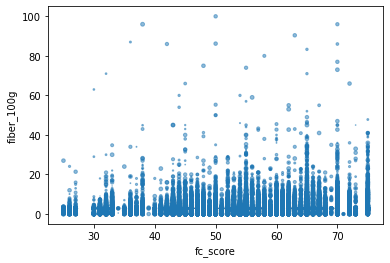

In [66]:
bivarie_scatter(data, 'fc_score', 'fiber_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: 3.71084207687305

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=0.119, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


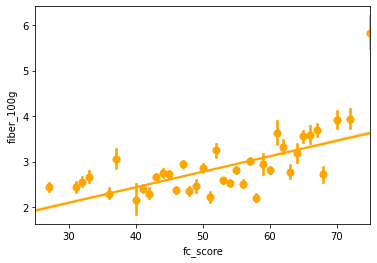

In [67]:
test_stat_continue_continue(data, 'fc_score', 'fiber_100g', 100)

### FC score vs proteins

Assumption

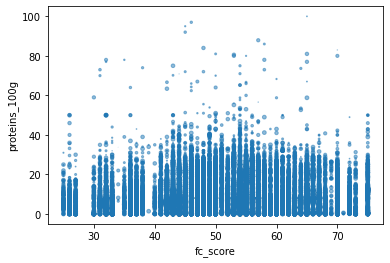

In [68]:
bivarie_scatter(data, 'fc_score', 'proteins_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: 2.303501189483236

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=0.030, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


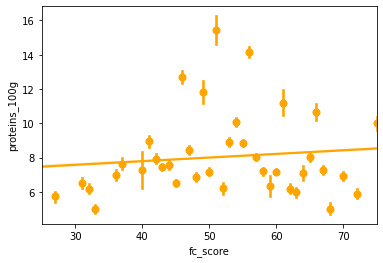

In [69]:
test_stat_continue_continue(data, 'fc_score', 'proteins_100g', 100)

### FC score vs sodium

Assumption

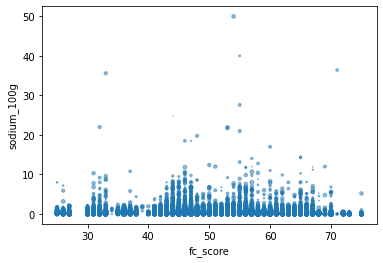

In [70]:
bivarie_scatter(data, 'fc_score', 'sodium_100g')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: -0.6424186027821572

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=-0.097, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


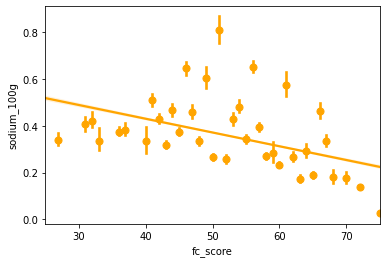

In [71]:
test_stat_continue_continue(data, 'fc_score', 'sodium_100g', 100)

### FC score vs additives

Assumption

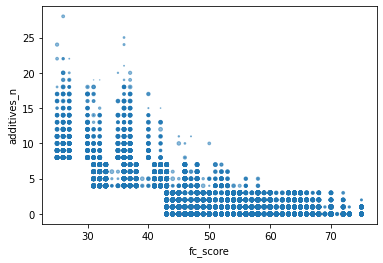

In [72]:
bivarie_scatter(data, 'fc_score', 'additives_n')

Tests

-----------------------------------------------------------
Covariance
-----------------------------------------------------------
Covariance: -16.221331935441768

-----------------------------------------------------------
Coefficient de corrélation Pearson
-----------------------------------------------------------
stat=-0.669, p=0.000
Probablement dépendant

-----------------------------------------------------------
Régression linéaire
-----------------------------------------------------------


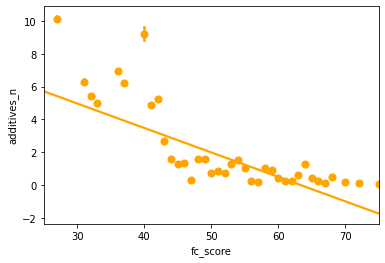

In [73]:
test_stat_continue_continue(data, 'fc_score', 'additives_n', 100)

## FoodChoose score & others issues

### Loca_score vs fc_score

Assumption

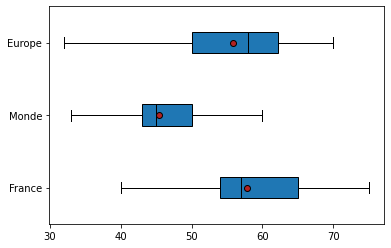

In [74]:
bivarie_qualitative_continue(data, 'loca_score', 'fc_score')

ANOVA

In [75]:
eta_squared(data['loca_score'],data['fc_score'])

0.3224580006286592

### Bioscore vs fc_score

Assumption

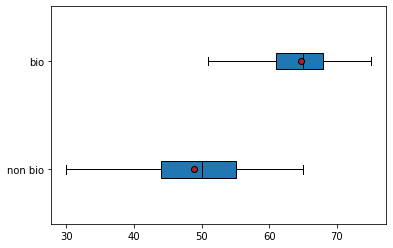

In [76]:
bivarie_qualitative_continue(data, 'bio_score', 'fc_score')

ANOVA

In [77]:
eta_squared(data['bio_score'],data['fc_score'])

0.4227022316323869

### Nova_group vs fc_score

Assumption

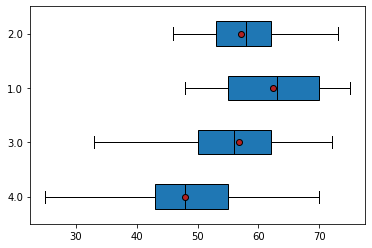

In [78]:
bivarie_qualitative_continue(data, 'nova_group', 'fc_score')

ANOVA

In [79]:
eta_squared(data['nova_group'],data['fc_score'])

0.2816090078224987

# Principal component analysis

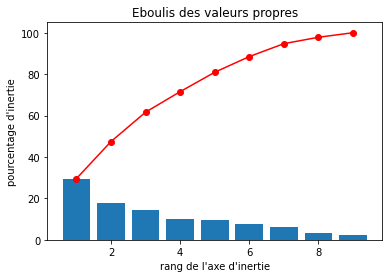

Variance expliquée par la 1ère composante principale = 29.532897166092937
Variance expliquée par les 2 1ère composantes principales = 47.431437061581235
Variance expliquée par les 3 1ère composantes principales = 61.61825079630214
Variance expliquée par les 4 1ère composantes principales = 71.53157636064812
Variance expliquée par les 5 1ère composantes principales = 80.90757266784198
Variance expliquée par les 6 1ère composantes principales = 88.47940488977619
Variance expliquée par les 7 1ère composantes principales = 94.7051775020156
Variance expliquée par les 8 1ère composantes principales = 97.81025052973249
Variance expliquée par les 9 1ère composantes principales = 100.00000000000001


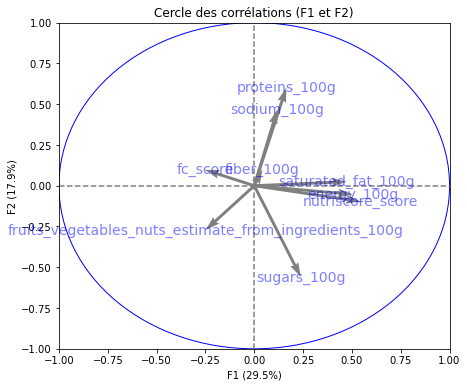

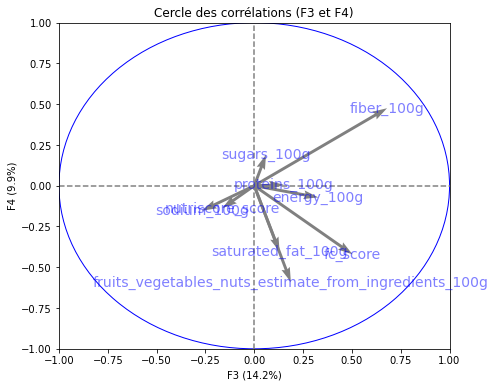

In [80]:
# choix du nombre de composantes à calculer
n_comp = 9

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[['energy_100g', 'saturated_fat_100g', 'sugars_100g', 'fiber_100g', 
                 'proteins_100g', 'sodium_100g', 'fruits_vegetables_nuts_estimate_from_ingredients_100g', 
                 'nutriscore_score', 'fc_score']]

# préparation des données pour l'ACP
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

for i in range(0, n_comp):
    if i==0:    
        print('Variance expliquée par la 1ère composante principale =',
             np.cumsum(pca.explained_variance_ratio_ * 100)[i])
    else:
        print('Variance expliquée par les ' + str(i+1) + ' 1ère composantes principales =',
             np.cumsum(pca.explained_variance_ratio_ * 100)[i])


# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

In [81]:
# Projection des individus
pca_projected = pca.transform(X_scaled)

data['F1'] = pca_projected[:, 0]
data['F2'] = pca_projected[:, 1]

<AxesSubplot:xlabel='F1', ylabel='F2'>

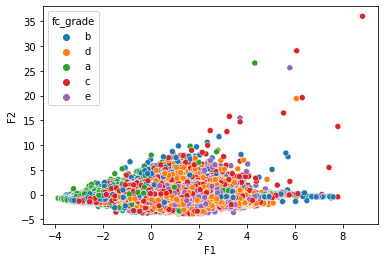

In [82]:
# Projection des individus
sns.scatterplot(data=data, x='F1', y='F2', hue='fc_grade')

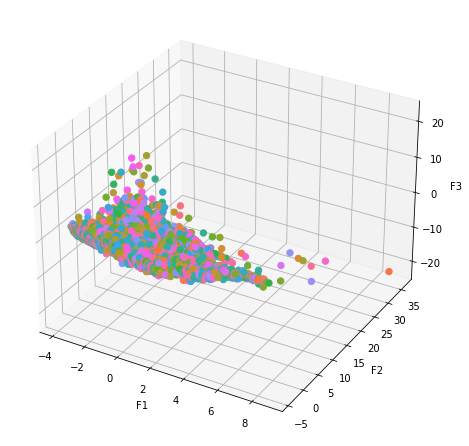

In [83]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# Projection des individus
X_projected = pca.transform(X_scaled)
n = len(data)
x = np.random.uniform(1, 20, size=n)

# plot
sc = ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')

# legend
plt.show()